<a href="https://colab.research.google.com/github/shussin245/GeneExpressionAnalysis/blob/main/WorkSample_GenExpAna_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

Hello! This is a walk-through tutorial on how I go about analzying gene expressions to develop models that can accurately predict a patient's response or resistance to immunotherapy. In this tutorial, we will go over some key terms as well as what exactly our code is composed of. For simplicity, I only use two alpha values, test 1000 values of lambda, and run the script 2x. However, in the "real world", we tend to use much, *much* larger numbers. Also, I created dummy datasets just for this example, however, we often use datasets with many more genes (here, we only have 249) with actual names. Anyways, enjoy this tutorial! I hope that I can teach you something new today and communicate the importance of statistics and computational analysis in solving real-world, biological problems.

## **Packages/Libraries Required**

These are the required libraries for this code. It may take 3-5 minutes to get all the packages installed.

In [ ]:
#<--- Make sure to click the RUN button to run every line of code!

In [ ]:
library(dplyr)              #Required for dataset manipulation in R
install.packages("glmnet")  #Required for elastic net models
library(glmnet)
install.packages("ROCR")    #Required for measuring and visualizing model performance
library(ROCR)
library(tidyr)              #Easier data readability and management
install.packages("vip")     #Required for determining gene importance
library(vip)

## **The Data** 

* Our "training" dataset is the data we use to train our model
* Our "testing" dataset is the data we will use to see if our model is a good performer
* "x" and "xt" = Gene expressions for training and testing datasets, respectively
* "y" and "yt" = Patient's response to immunotherapy for training and testing datasets, respectively
* 0 = no response
* 1 = response
* To see what the data looks like, make a new code line and type:

```
train
```
or

```
test
```

In [ ]:
#Training dataset
train = read.csv("https://raw.githubusercontent.com/shussin245/NGS/main/Sample_Train.csv")
x = as.matrix(train[1:249])
y = train$Response                

#Testing dataset
test = read.csv("https://raw.githubusercontent.com/shussin245/NGS/main/Sample_Test.csv")
xt = as.matrix(test[1:249])
yt = test$Response

## **WARNING: BIG AND FANCY WORDS AHEAD**

### *Regularization*

Regularization is a form of regression that is designed to make models "simpler" by decreasing the feature (i.e. gene) coefficients to 0, thus, elimating genes that have no predicitive value and limiting covariance (features that behave similarily). There are two techniques for regularization:


1.   L1 Regularization: Penalizes the sum of absolute values of the coefficients, performing selection by reducing gene coefficients to 0.
2.   L2 Regularization: Penalizes the sum of squares of the coefficients, thus, doesn't perform selection since it only reduces the coefficients to values *near* 0 (i.e. uses every gene in the model).





### *What is Elastic Net?*
* Elastic net is a statistical regularization technique that combines the L1 and L2 penalties
* The alpha (𝛼) parameter is any value between 0 and 1 that determines how much of each penalty is applied in the model
* Ridge models (𝛼 = 0) use all the genes for our model
* Lasso models (𝛼 = 1) reduce the weight of the genes so that most genes are completely opted out of the model, thus, leaving only the genes that make the best model :)
* Generally, as we increase the 𝛼 value, the less genes our model will use, as more of the L1 penalty is applied

### *Importance of Cross-Validation*
* Cross-validation discovers the best lambda (𝜆) and also prevents over-fitting, which is a model that fits too closely with the training set and won't be able to perform well with our testing set
* The 𝜆 value is where the model has the smallest mean cross-validated error

### *How do we even know if our model is good enough?*
* AUC scores measure our model's prediction performance on a scale of 0 to 1  (the higher the AUC, the better our model is able to distinguish between the responders and non-responders)
* An AUC of 0.5 is a random classifier, thus, scores lower than 0.5 perform worse than random :(
* The ROC curve is simply a visual representation of our AUC score, with the diagnol line representing an AUC of 0.5
* The more the curve is leaned towards the top left, the better our model
* Later, we will see that the plot is the true positive rate (TPR) against the false positive rate (FPR). We want to have the least possible value for FPR while having the highest possible value for TPR). So, you will see later while the top left corner is important. 
* In this script, I only show the best models that I get (again, we could run the script 1000x, but I only do it here 2x)

### *Feature Importance*

Features are anything that serve to predict the outcome. In this case, the genes are the features and the patient response is the outcome. When we get our models, not only do we get the performance of the model, but we also get genes and their coefficients for that particular model. Of course, we can read every gene and its coefficient, but a plot is more fun. The higher the coefficient, the more predictive value that gene holds. It's important to note that coefficients can be negative, thus, we consider the absolute value of the coefficients since a negative coefficient just means that there's an inverse relationship between the gene and the response.

## **BEHOLD THE CODE**

[1] "Alpha: 0.3"
[1] "Best lambda:  0.0205643534988803"
[1] "CV AUC: 0.875651001141197"
[1] "VAL AUC: 0.91523"
 [1] "(Intercept)" "Gene.1"      "Gene.4"      "Gene.5"      "Gene.12"    
 [6] "Gene.14"     "Gene.16"     "Gene.18"     "Gene.19"     "Gene.23"    
[11] "Gene.27"     "Gene.33"     "Gene.36"     "Gene.41"     "Gene.45"    
[16] "Gene.47"     "Gene.48"     "Gene.52"     "Gene.56"     "Gene.59"    
[21] "Gene.61"     "Gene.62"     "Gene.64"     "Gene.65"     "Gene.68"    
[26] "Gene.71"     "Gene.74"     "Gene.76"     "Gene.80"     "Gene.83"    
[31] "Gene.89"     "Gene.90"     "Gene.92"     "Gene.96"     "Gene.97"    
[36] "Gene.99"     "Gene.104"    "Gene.108"    "Gene.117"    "Gene.118"   
[41] "Gene.119"    "Gene.120"    "Gene.121"    "Gene.122"    "Gene.125"   
[46] "Gene.126"    "Gene.128"    "Gene.136"    "Gene.138"    "Gene.139"   
[51] "Gene.141"    "Gene.146"    "Gene.148"    "Gene.152"    "Gene.156"   
[56] "Gene.159"    "Gene.161"    "Gene.164"    "Gene.165"    "Ge

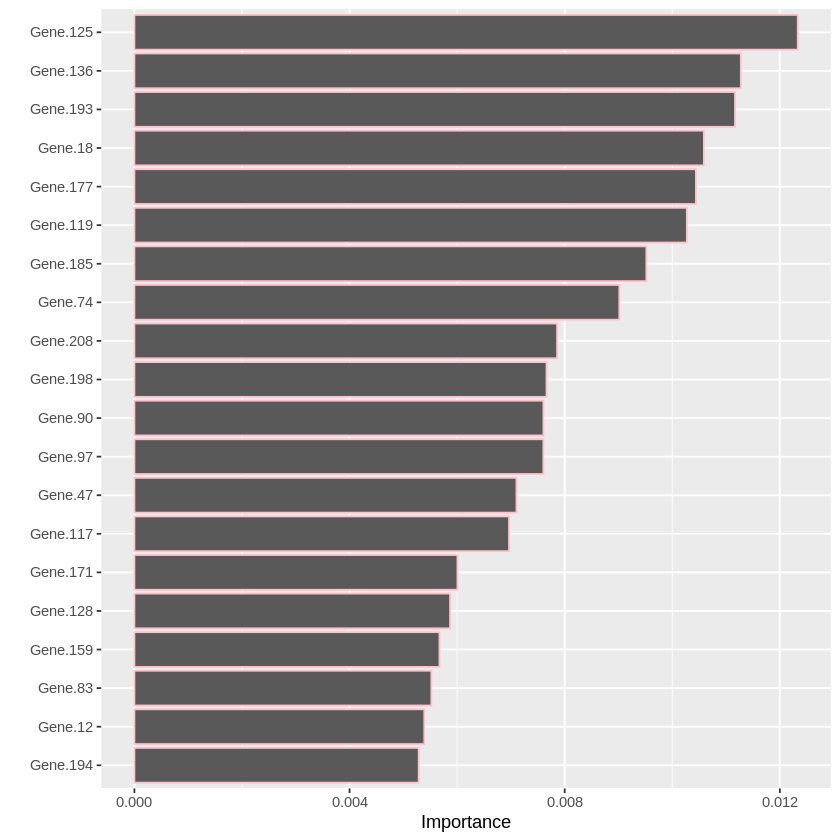

[1] "Alpha: 0.3"
[1] "Best lambda:  0.026014600614225"


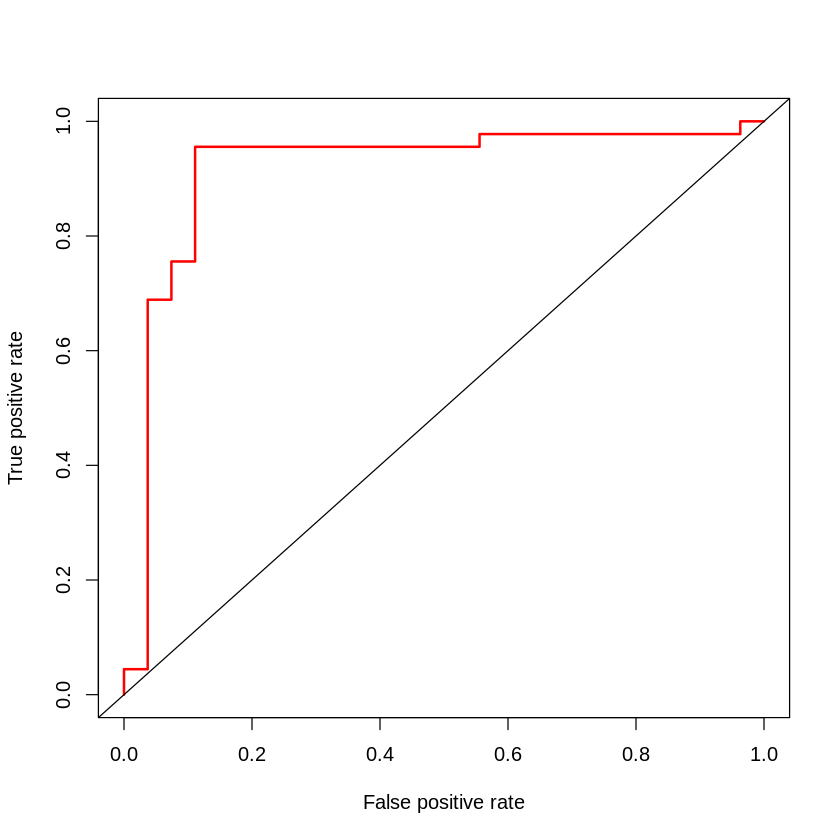

[1] "CV AUC: 0.865252976190476"
[1] "VAL AUC: 0.91193"
 [1] "(Intercept)" "Gene.1"      "Gene.4"      "Gene.5"      "Gene.12"    
 [6] "Gene.14"     "Gene.16"     "Gene.18"     "Gene.19"     "Gene.23"    
[11] "Gene.36"     "Gene.41"     "Gene.47"     "Gene.48"     "Gene.52"    
[16] "Gene.56"     "Gene.59"     "Gene.62"     "Gene.64"     "Gene.65"    
[21] "Gene.68"     "Gene.71"     "Gene.74"     "Gene.76"     "Gene.80"    
[26] "Gene.83"     "Gene.89"     "Gene.90"     "Gene.92"     "Gene.96"    
[31] "Gene.97"     "Gene.99"     "Gene.104"    "Gene.117"    "Gene.118"   
[36] "Gene.119"    "Gene.120"    "Gene.121"    "Gene.125"    "Gene.126"   
[41] "Gene.128"    "Gene.136"    "Gene.138"    "Gene.139"    "Gene.141"   
[46] "Gene.146"    "Gene.148"    "Gene.152"    "Gene.156"    "Gene.159"   
[51] "Gene.164"    "Gene.171"    "Gene.174"    "Gene.175"    "Gene.177"   
[56] "Gene.180"    "Gene.182"    "Gene.184"    "Gene.185"    "Gene.186"   
[61] "Gene.193"    "Gene.194"    "Gene.196"  

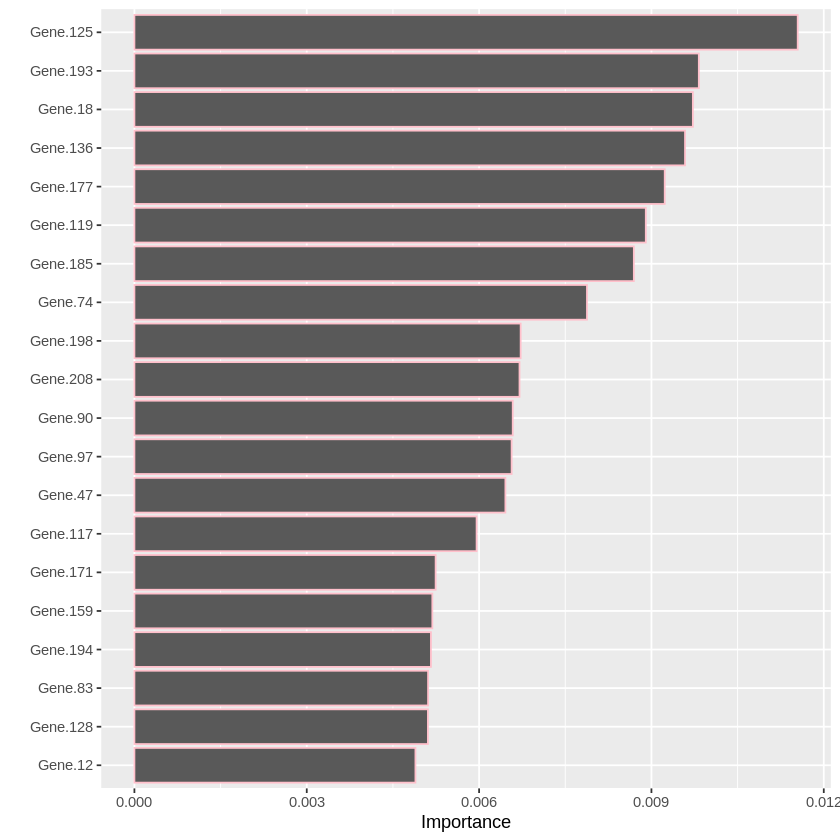

[1] "Alpha: 1"
[1] "Best lambda:  0.0150183666186633"


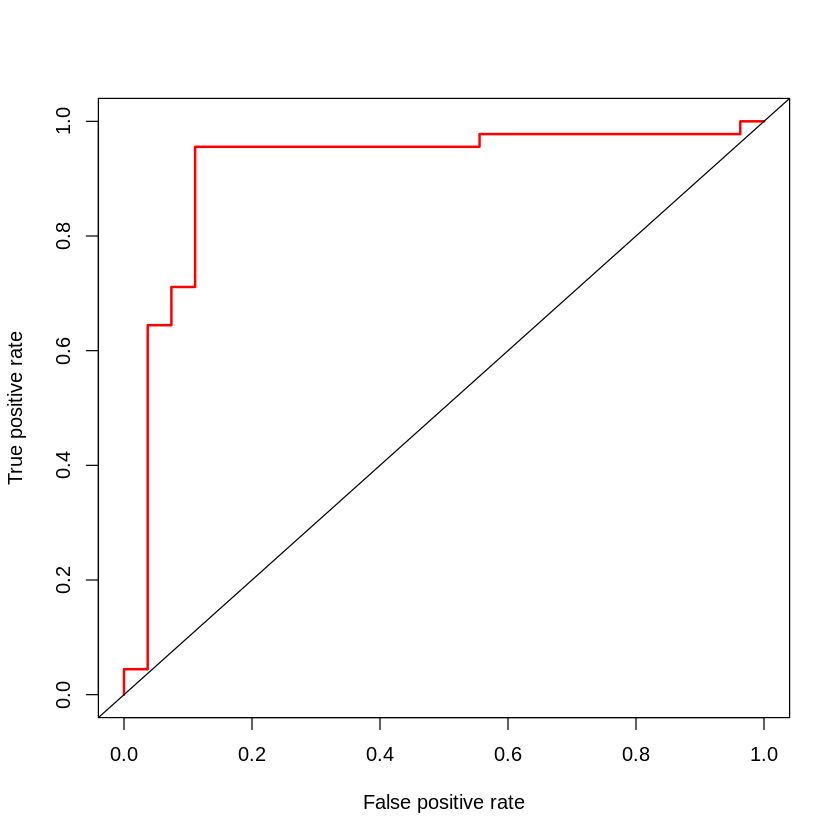

[1] "CV AUC: 0.810346975328593"
[1] "VAL AUC: 0.90947"
 [1] "(Intercept)" "Gene.4"      "Gene.12"     "Gene.18"     "Gene.41"    
 [6] "Gene.47"     "Gene.71"     "Gene.74"     "Gene.83"     "Gene.90"    
[11] "Gene.92"     "Gene.117"    "Gene.118"    "Gene.119"    "Gene.121"   
[16] "Gene.125"    "Gene.128"    "Gene.136"    "Gene.138"    "Gene.146"   
[21] "Gene.159"    "Gene.180"    "Gene.185"    "Gene.193"    "Gene.194"   
[26] "Gene.198"    "Gene.208"    "Gene.228"   


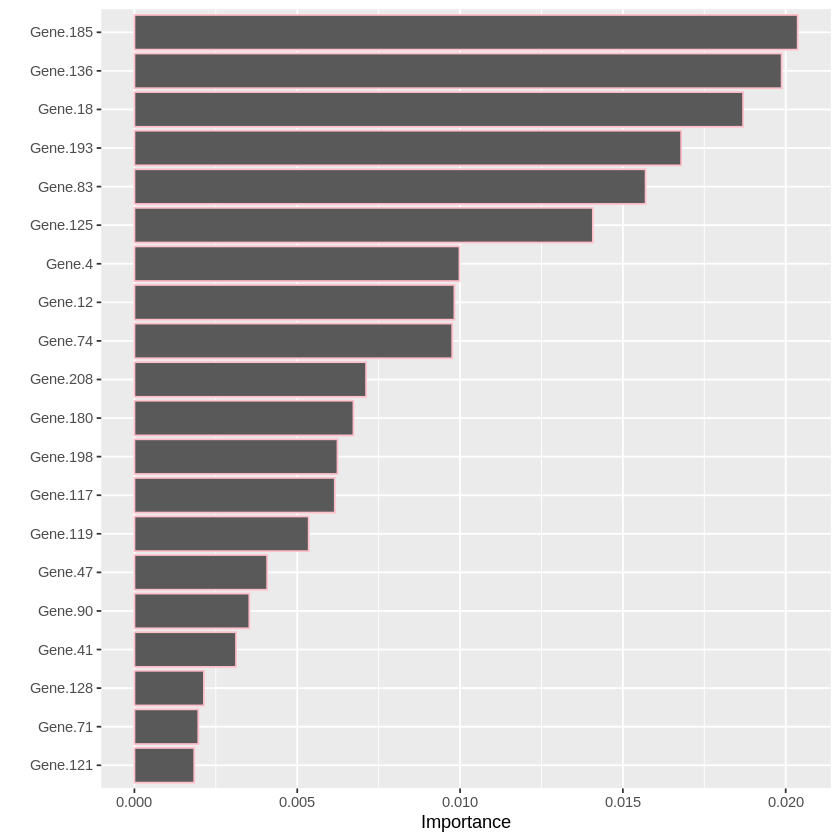

[1] "Alpha: 1"
[1] "Best lambda:  0.0023324583263991"


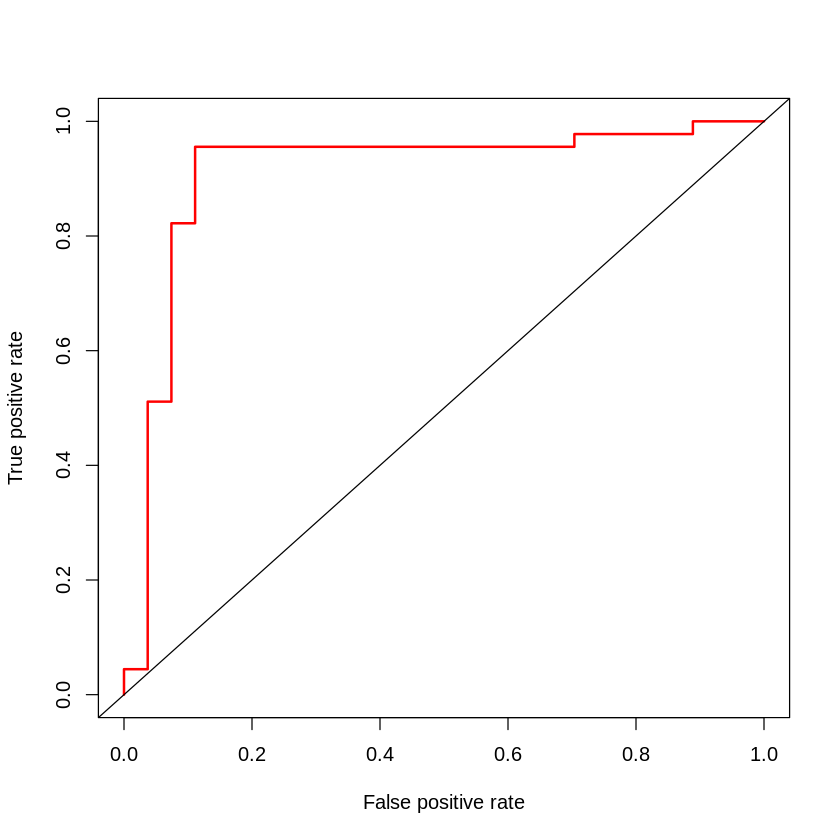

[1] "CV AUC: 0.912433862433862"
[1] "VAL AUC: 0.89877"
 [1] "(Intercept)" "Gene.4"      "Gene.12"     "Gene.18"     "Gene.41"    
 [6] "Gene.47"     "Gene.48"     "Gene.71"     "Gene.74"     "Gene.83"    
[11] "Gene.90"     "Gene.92"     "Gene.97"     "Gene.117"    "Gene.118"   
[16] "Gene.119"    "Gene.121"    "Gene.125"    "Gene.128"    "Gene.136"   
[21] "Gene.146"    "Gene.148"    "Gene.177"    "Gene.180"    "Gene.185"   
[26] "Gene.193"    "Gene.198"    "Gene.208"    "Gene.228"    "Gene.237"   


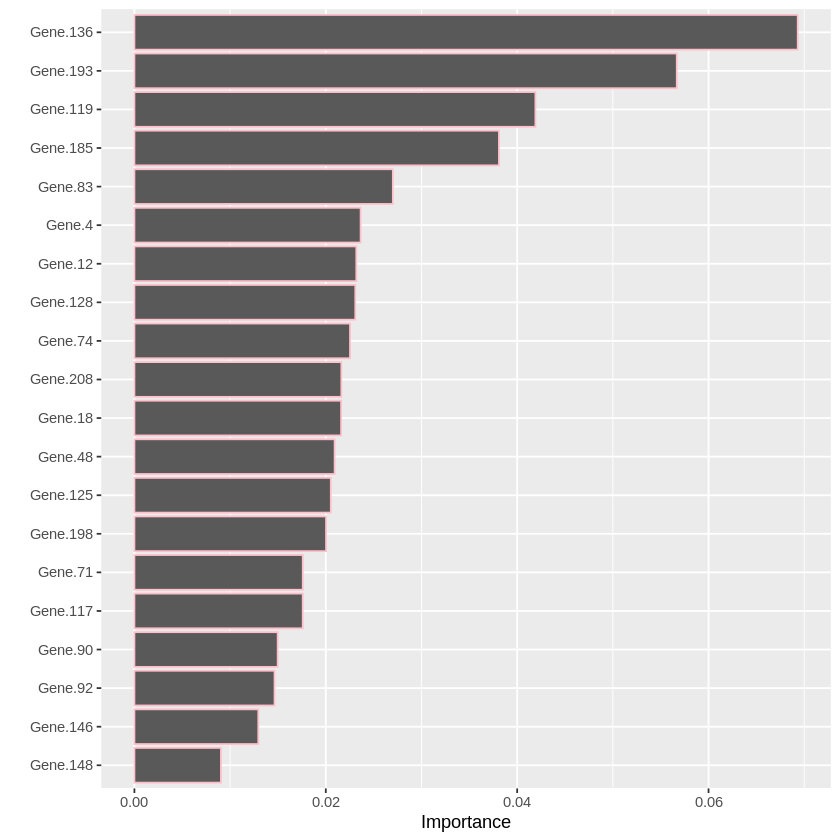

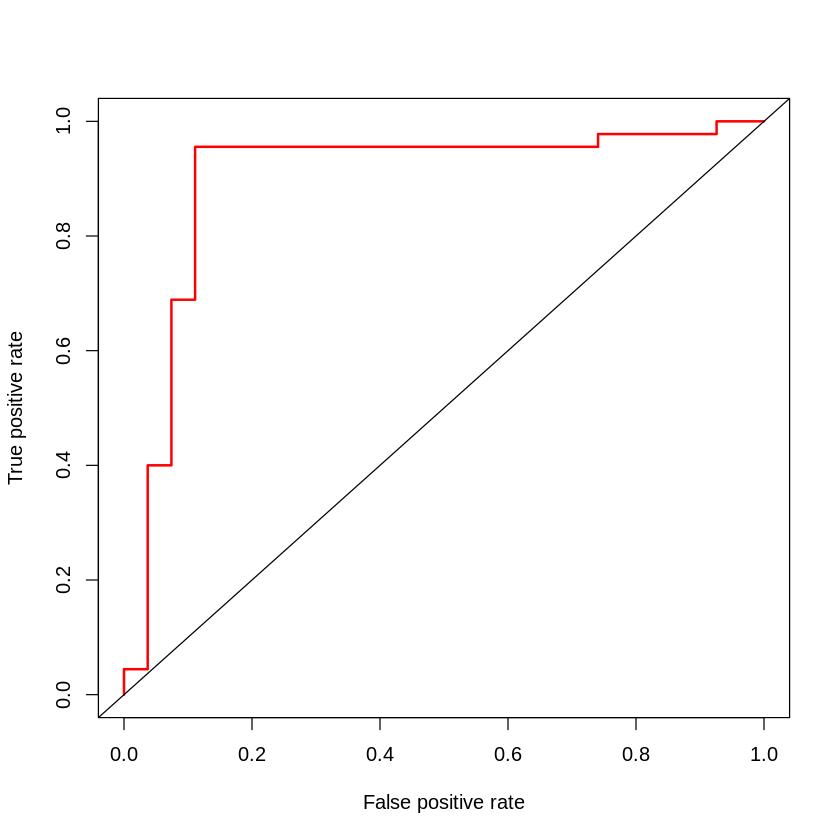

In [ ]:
#Set seed to be able to reproduce the data (imagine getting an excellent model, but forgetting to set.seed!?)
set.seed(123)       

#Creating a model for multiple values of alpha
#Using alpha 0.3 and 1, but can be any value between 0 and 1
for(al in c(0.3, 1))    
{
  #Repeated this process 2x
  for(i in 1:2)                                                      
  {
    print(paste0("Alpha: ", al))

    #Cross-validation finds the best lambda
    model = cv.glmnet(x, y, alpha=al, nlambda=1000, family="binomial", type.measure="auc", nfolds=3)

    #Lambda that has the lowest cross-validation error
    best_lam = model$lambda.min                                                                
    print(paste("Best lambda: ", best_lam))

    #Creating another model using the best lambda value
    best_lam_model = glmnet(x, y, alpha=al, lambda=best_lam, family="binomial")

    #Creating a feature importance plot that illustrates the significane of each in the model
    #Shows only the first 20 genes, but can be adjusted to show any number of genes from our model
    gene_imp = vip(best_lam_model, num_features=20L, geom="col", aesthetics= list(col="pink"))
    plot(gene_imp)

    #If the model has a AUC score above 0.7, 
    #then it will move on validation using the test dataset 
    test1 = max(model$cvm)
    if(test1 > 0.7)
    {
      #Seeing how well our model predicts response for patients with different
      #gene expressions
      prob_data = predict(best_lam_model, xt, type="response")                                        
      pred_data = prediction(prob_data, yt)

      #Measuring the performance of our predictions 
      #(i.e. were the predictions correct?)                                                           
      aucs = attr(performance(pred_data, "auc"), "y.values")[[1]]

      #The AUC score for our model                                
      formatted_auc = signif(aucs, digits=5) 

      #The ROC plot visualizes our model performance
      rocs = performance(pred_data, measure="tpr", x.measure="fpr")

      #I only want to show the scores, plots, and genes from the best models
      if(formatted_auc > 0.7)
      {
        print(paste0("CV AUC: ", max(model$cvm)))
        print(paste0("VAL AUC: ", formatted_auc))

        #Printing the coefficients associated with our model
        coefs = rownames(coef(best_lam_model))[coef(best_lam_model)[,1]!= 0]
        print(coefs)
        plot(rocs, lwd=2, col="red")

        #Diagnol line that represents a random classifier
        abline(a=0, b=1)
      }
      else
      print(paste0("NOT GOOD MODEL - TEST AUC: ", formatted_auc))
    }
    else
    {
      print(paste0("MODEL DID NOT PROCEED TO VALIDATION - CV AUC: ", model$cvm))
    }
  }
}

## **Final notes...**

I really hope you enjoyed this tutorial! This walk-through was also designed to be interactive. You can always go back and change some of the code. For example, you can change the alpha value to a lower value to see which genes you get or you can use different datasets if you like! If you have an questions or concerns, please reach out to me at sh284752@gmail.com!

## **Edits and Updates**

03/30/2022: Corrected text errors.
            Added a line that made sure viewers clicked the RUN button.

04/28/2022: Corrected text errors. Provided more information on regularization and feature importance. Installed the VIP package. Included code that develops a feature importance plot.

04/29/2022: Corrected text errors.